In [1]:
%reset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio
import glob
import os

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def load_images(test_root, gt_root):
    test_images = []
    gt_images = []
    cnt_1 = 0
    cnt_2 = 0
    for image_name in glob.glob(f'{test_root}/*.jpg'):
        test_image = mpimg.imread(image_name)
        if test_image.shape[0] == 321 and cnt_1 != 50:
            cnt_1 += 1
            _, t = os.path.split(image_name)
            filename = os.path.splitext(t)[0]
            
            gt_img = sio.loadmat(f'{gt_root}{filename}')
            x = gt_img['groundTruth'][0][0][0][0][0].reshape((1,321,481))
            y = gt_img['groundTruth'][0][0][0][0][1].reshape((1,321,481))
            gt = np.concatenate((x,y))
            
            test_images.append(mpimg.imread(image_name))
            gt_images.append(gt)
        else:
            cnt_2 += 1
    return np.asarray(test_images), np.asarray(gt_images)

In [3]:
root_test, root_gt = 'BSR_bsds500/BSR/BSDS500/data/images/test/', 'BSR_bsds500/BSR/BSDS500/data/groundTruth/test/'

test, ground_truth = load_images(root_test, root_gt)

In [40]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
def display_image_and_gt(images, gt, idx):
    f, axes = plt.subplots(1,3,figsize=(20,20))
    print(axes.shape)
    axes[0].imshow(images[idx])
    axes[0].axis('off')
    axes[1].imshow(gt[idx,0])
    axes[1].axis('off')
    axes[2].imshow(gt[idx,1])
    axes[2].axis('off')
    plt.subplots_adjust(wspace=0.01)

    
#     plt.subplot(131)
#     plt.imshow(images[idx],interpolation='nearest')
#     plt.axis('off')
#     plt.gca().autoscale(False)
#     plt.subplot(132)
#     plt.imshow(gt[idx,0],interpolation='nearest')
#     plt.axis('off')
#     plt.gca().autoscale(False)
#     plt.subplot(133)
#     plt.imshow(gt[idx,1],interpolation='nearest')
#     plt.axis('off')
#     plt.gca().autoscale(False)
    plt.show()

(3,)


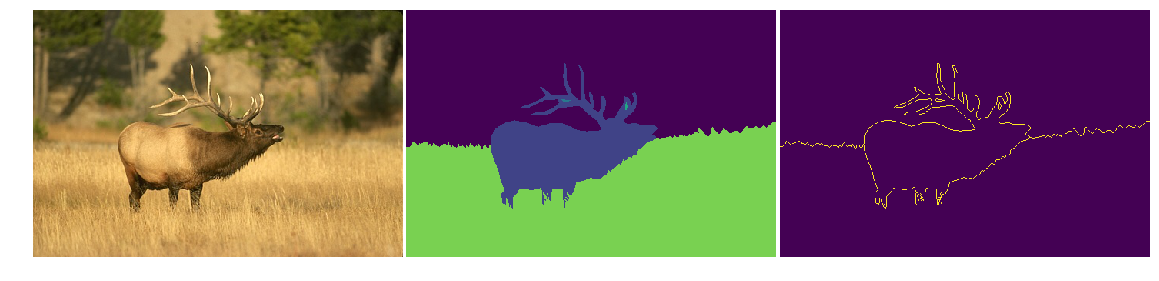

In [41]:
display_image_and_gt(test,ground_truth, 10)